In [1]:
import numpy as np
import qiskit as q
from qiskit import QuantumCircuit
from qiskit import Aer #simulator framework for qiskit
from matplotlib import style
style.use("classic")
%matplotlib inline

In [2]:
nqubits = 3

In [3]:
# apply Hadamard gate to all qubits
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
        
    return qc

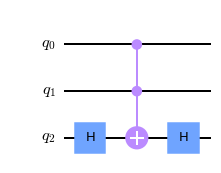

In [4]:
import math
from math import pi
# Oracle circuit

oracle = QuantumCircuit(nqubits, name='oracle$_\omega$')

#theta = pi # theta can be anything (pi chosen arbitrarily)
#oracle.ry(theta/2,1)
#oracle.cx(0,1)
#oracle.ry(-theta/2,1)
#oracle.cx(0,1)


oracle.h(2)
oracle.ccx(0,1,2)
oracle.h(2)

#oracle.ch(0,2)
#oracle.cz(1,2)
#oracle.ch(0,2)

#oracle.ch(0,2)
#oracle.ccx(1,3,2)
#oracle.ch(0,2)

#for qubit in range(nqubits-1):
#    oracle.cz(qubit, nqubits-1)


'''
from qiskit_textbook.problems import grover_problem_oracle
oracle = grover_problem_oracle(nqubits, variant=1, print_solutions = True)
'''

oracle.to_gate()

oracle.draw('mpl')

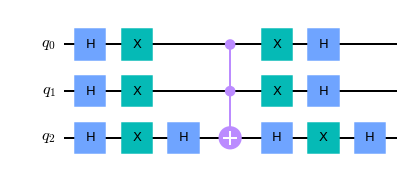

In [5]:
# Diffuser circuit

diffuser = QuantumCircuit(nqubits, name='diffuser$_s$')
for qubit in range(nqubits):
    diffuser.h(qubit)
for qubit in range(nqubits):
    diffuser.x(qubit)
# Do multi-controlled-Z gate
diffuser.h(nqubits-1)
diffuser.mct(list(range(nqubits-1)), nqubits-1)
diffuser.h(nqubits-1)
for qubit in range(nqubits):
    diffuser.x(qubit)
for qubit in range(nqubits):
    diffuser.h(qubit)
diffuser.to_gate()
diffuser.draw('mpl')


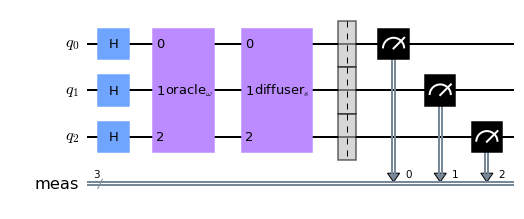

In [6]:
grover_circuit = QuantumCircuit(nqubits)
grover_circuit = initialize_s(grover_circuit, range(nqubits))
grover_circuit.append(oracle, range(nqubits))
grover_circuit.append(diffuser, range(nqubits))
grover_circuit.measure_all()
grover_circuit.draw('mpl')

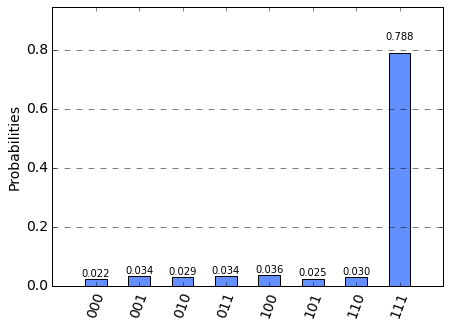

In [7]:
from qiskit.visualization import plot_histogram

aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = q.transpile(grover_circuit, aer_sim)
qobj = q.assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [8]:

from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

IBMQ.load_account()

provider = IBMQ.get_provider(hub="ibm-q")
backend = provider.get_backend("ibmq_manila")
job = q.execute(grover_circuit , backend=backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


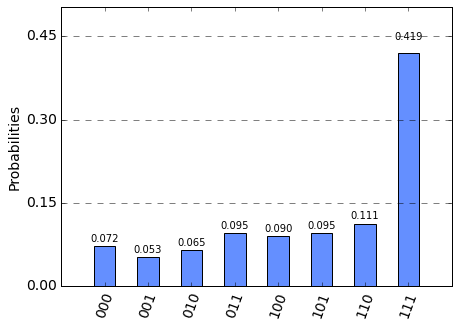

In [9]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(grover_circuit)

plot_histogram([counts])